In [31]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix,roc_curve, roc_auc_score, auc, f1_score
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [32]:
def train_test_split_per_user(data, train_size=0.7, target_column='label_negative_affect_category'):
    users = list(set(data.id))
    users = sorted(users, reverse=True)  # fix randomness
    total_users = len(users)
    slice_idx = int(train_size * total_users)
    users_train = users[:slice_idx]
    users_test = users[slice_idx:]
    
    # Split data based on user IDs
    train_data = data[data.id.isin(users_train)]
    test_data = data[data.id.isin(users_test)]
    
    x_train = train_data.drop(['id', target_column], axis=1) 
    y_train = train_data[target_column]  
    x_test = test_data.drop(['id', target_column], axis=1) 
    y_test = test_data[target_column]  
    
    return x_train, y_train, x_test, y_test

In [33]:
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.title('Confusion Matrix')
    plt.show()

In [34]:
custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f']
complementary_colors = ['#a9d0f5', '#f3ba8c', '#98e698', '#f5a9a9', '#d8b5d8', '#d2a6a6', '#f5a9f2', '#d8d8d8']

full_palette = custom_colors + complementary_colors
sns.set_palette(full_palette)

plt.rcParams['axes.prop_cycle'] = plt.cycler(color=custom_colors)
plt.rcParams['axes.titlesize'] = 30
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['legend.fontsize'] = 15

In [35]:
df = pd.read_pickle('../data/lifesnaps/lifesnapsv2.pkl')
df['id'] = df['id'].astype(str)
df = df[df['label_stress_sema'].notna()]
df

,id,nightly_temperature,nremhr,rmssd,spo2,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,responsiveness_points_percentage,...,weekday_sin,week_sin,day_sin,month_cos,weekday_cos,week_cos,day_cos,label_stress_sema,label_negative_affect_category,label_stai_stress_category
1,621e30e467b776a240e817c7,33.274919,52.5365,38.1610,94.5,17.2,0.0,0.000000,0.000,0.000000,...,0.000000,0.309017,-0.988468,0.5,1.00000,0.951057,0.151428,1.0,1,1
6,621e32af67b776a24045b4cf,34.119702,51.6220,43.5360,97.8,13.8,79.0,0.833333,0.700,0.866667,...,0.000000,0.309017,-0.988468,0.5,1.00000,0.951057,0.151428,0.0,1,1
8,621e301e67b776a240608a72,34.710232,62.3900,34.0570,96.0,15.0,74.0,0.700000,0.700,0.833333,...,0.000000,0.309017,-0.988468,0.5,1.00000,0.951057,0.151428,0.0,1,1
9,621e337667b776a240ce78ab,33.662874,52.9270,39.9390,95.5,11.2,60.0,0.633333,0.550,0.633333,...,0.000000,0.309017,-0.988468,0.5,1.00000,0.951057,0.151428,0.0,1,1
17,621e2f7a67b776a240f14425,32.556993,62.3900,34.0570,96.7,15.0,72.0,0.733333,0.700,0.700000,...,0.000000,0.309017,-0.988468,0.5,1.00000,0.951057,0.151428,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4873,621e33cf67b776a240087de9,33.892631,62.8590,49.3950,96.0,12.0,77.0,0.566667,0.925,0.766667,...,-0.781831,0.587785,-0.101168,0.5,0.62349,0.809017,-0.994869,1.0,1,1
4888,621e346f67b776a24081744f,32.903545,71.8630,25.4750,96.0,18.2,72.0,0.833333,0.625,0.733333,...,0.000000,0.809017,-0.299363,0.5,1.00000,0.587785,-0.954139,1.0,1,1
4891,621e2f9167b776a240011ccb,34.716690,58.4890,28.3290,96.5,14.2,76.0,0.800000,0.600,0.933333,...,0.000000,0.809017,-0.299363,0.5,1.00000,0.587785,-0.954139,1.0,1,1
4900,621e331067b776a24085dd3f,34.683800,62.3900,34.0570,96.0,15.0,72.0,0.733333,0.700,0.700000,...,0.000000,0.809017,-0.299363,0.5,1.00000,0.587785,-0.954139,0.0,1,1


In [36]:
df['label_stress_sema'].value_counts()

0.0    1750
1.0     496
Name: label_stress_sema, dtype: int64

In [37]:
df = df.drop(columns=['label_stai_stress_category', 'label_negative_affect_category' ])
df

,id,nightly_temperature,nremhr,rmssd,spo2,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,responsiveness_points_percentage,...,bmi,month_sin,weekday_sin,week_sin,day_sin,month_cos,weekday_cos,week_cos,day_cos,label_stress_sema
1,621e30e467b776a240e817c7,33.274919,52.5365,38.1610,94.5,17.2,0.0,0.000000,0.000,0.000000,...,3,-0.866025,0.000000,0.309017,-0.988468,0.5,1.00000,0.951057,0.151428,1.0
6,621e32af67b776a24045b4cf,34.119702,51.6220,43.5360,97.8,13.8,79.0,0.833333,0.700,0.866667,...,1,-0.866025,0.000000,0.309017,-0.988468,0.5,1.00000,0.951057,0.151428,0.0
8,621e301e67b776a240608a72,34.710232,62.3900,34.0570,96.0,15.0,74.0,0.700000,0.700,0.833333,...,1,-0.866025,0.000000,0.309017,-0.988468,0.5,1.00000,0.951057,0.151428,0.0
9,621e337667b776a240ce78ab,33.662874,52.9270,39.9390,95.5,11.2,60.0,0.633333,0.550,0.633333,...,1,-0.866025,0.000000,0.309017,-0.988468,0.5,1.00000,0.951057,0.151428,0.0
17,621e2f7a67b776a240f14425,32.556993,62.3900,34.0570,96.7,15.0,72.0,0.733333,0.700,0.700000,...,1,-0.866025,0.000000,0.309017,-0.988468,0.5,1.00000,0.951057,0.151428,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4873,621e33cf67b776a240087de9,33.892631,62.8590,49.3950,96.0,12.0,77.0,0.566667,0.925,0.766667,...,2,0.866025,-0.781831,0.587785,-0.101168,0.5,0.62349,0.809017,-0.994869,1.0
4888,621e346f67b776a24081744f,32.903545,71.8630,25.4750,96.0,18.2,72.0,0.833333,0.625,0.733333,...,3,0.866025,0.000000,0.809017,-0.299363,0.5,1.00000,0.587785,-0.954139,1.0
4891,621e2f9167b776a240011ccb,34.716690,58.4890,28.3290,96.5,14.2,76.0,0.800000,0.600,0.933333,...,1,0.866025,0.000000,0.809017,-0.299363,0.5,1.00000,0.587785,-0.954139,1.0
4900,621e331067b776a24085dd3f,34.683800,62.3900,34.0570,96.0,15.0,72.0,0.733333,0.700,0.700000,...,1,0.866025,0.000000,0.809017,-0.299363,0.5,1.00000,0.587785,-0.954139,0.0


In [38]:
X_train, y_train, X_test, y_test = train_test_split_per_user(df,target_column='label_stress_sema')

In [39]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1480, 46) (1480,) (766, 46) (766,)


In [40]:
# Initialize SMOTE
smote = SMOTE(random_state=42)
# Fit SMOTE to the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
# Now X_train_smote and y_train_smote have balanced classes

In [41]:
# Initialize the RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, max_depth=100, class_weight='balanced', random_state=42)

# Perform 5-fold cross-validation using F1 score as the metric
#f1_scores = cross_val_score(clf, X_train_smote, y_train_smote, cv=100, scoring='f1')

#print(f"F1 scores for 5-fold cross-validation: {f1_scores}")
#print(f"Mean F1 score: {f1_scores.mean()}")

In [42]:
clf.fit(X_train_smote, y_train_smote)
y_pred = clf.predict(X_test)

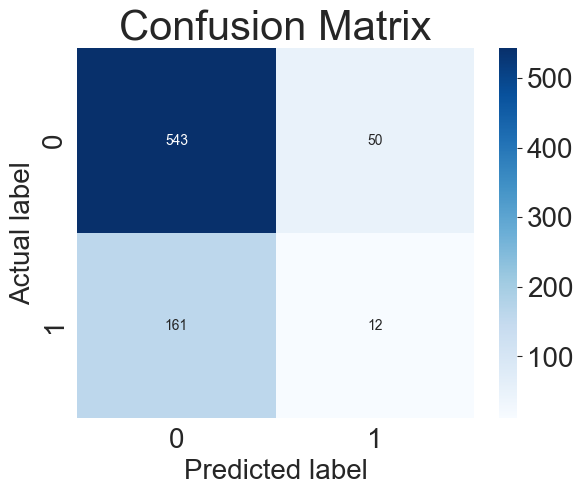

In [43]:
plot_confusion_matrix(y_test, y_pred)

# ROC AUC curve

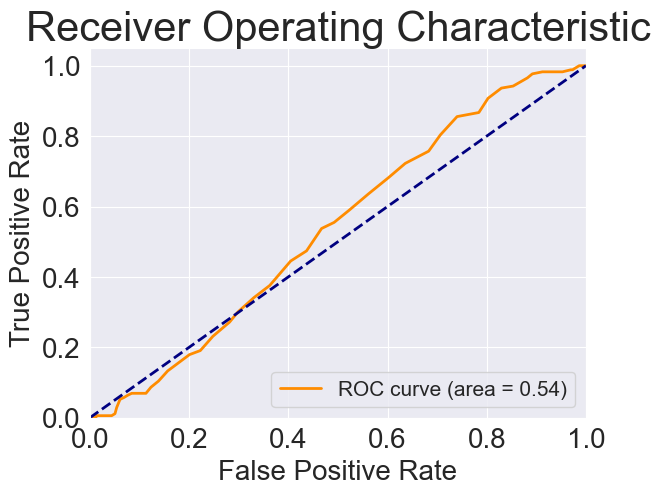

In [44]:
# Predict probabilities
y_scores = clf.predict_proba(X_test)[:, 1]  # get the probability of class 1

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [45]:
roc_auc = roc_auc_score(y_test, y_scores)

# Calculating F1 Score
f1 = f1_score(y_test, y_pred)

print(f"AUC-ROC Score: {roc_auc}")
print(f"F1 Score: {f1}")

AUC-ROC Score: 0.5386542416828315
F1 Score: 0.10212765957446807
